# Personal Loan Approval Prediction Using Machine Learning


# Business problem

Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan. Company wants to automate the loan eligibility process based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.

# Data collection

In [2]:
#importing libraries
import pandas as pd                         
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
#importing the data set
loan_df=pd.read_csv("trainlap.csv")

# Data Preparation

In [4]:
#it describes the no of rows and columns in the dataset
#it contains 614 rows and 13 columns
loan_df.shape

(614, 13)

In [5]:
#it display information about data set
#it shows default by first and last 5 rows
print(loan_df)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN           

In [6]:
#it shows the first 5 rows by default 
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
#it shows the last 5 rows by default
loan_df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [8]:
#it gives stastical measures of a data set
loan_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
#it shows the information of dataset with total rows and columns and shows the data types of each column and memory usage
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [10]:
#from data.info() we see there is null values in the dataset
#non-null count means it shows the total non null values present in the dataset with total entries(614)
#_____________________________total null values present in each column given below________________________________________
loan_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
#we can see out of 100% the null values are missing
loan_df.isnull().sum()*100/ len(loan_df)

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [12]:
import pandas as pd                         
import numpy as np
loan_df.drop('Loan_ID', axis=1, inplace=True)

In [13]:
print(loan_df)

     Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0      Male      No          0      Graduate            No             5849   
1      Male     Yes          1      Graduate            No             4583   
2      Male     Yes          0      Graduate           Yes             3000   
3      Male     Yes          0  Not Graduate            No             2583   
4      Male      No          0      Graduate            No             6000   
..      ...     ...        ...           ...           ...              ...   
609  Female      No          0      Graduate            No             2900   
610    Male     Yes         3+      Graduate            No             4106   
611    Male     Yes          1      Graduate            No             8072   
612    Male     Yes          2      Graduate            No             7583   
613  Female      No          0      Graduate           Yes             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

# univariate analysis

In [14]:
import seaborn as sns
loan_df['Loan_Status'].value_counts()


Y    422
N    192
Name: Loan_Status, dtype: int64

Text(0.5, 1.0, 'Loan_Status')

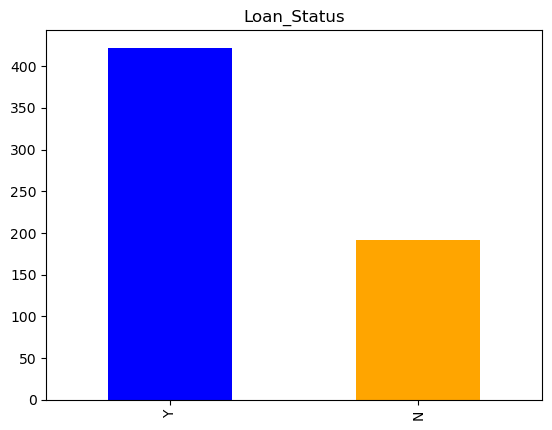

In [15]:
loan_df['Loan_Status'].value_counts()
loan_df['Loan_Status'].value_counts().plot.bar(color=[ 'blue','orange'])
plt.title('Loan_Status')

Text(0.5, 1.0, 'Gender')

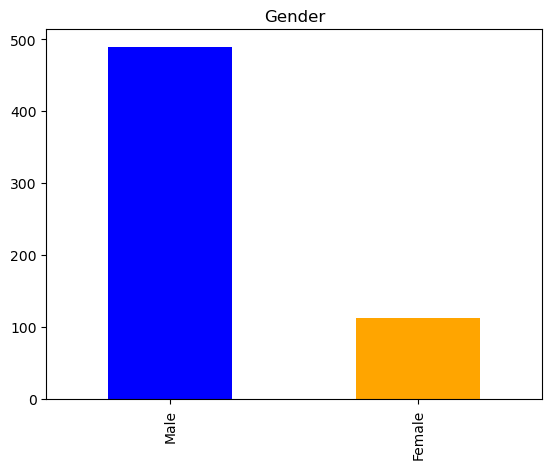

In [16]:
loan_df['Gender'].value_counts()
loan_df['Gender'].value_counts().plot.bar(color=[ 'blue','orange'])
plt.title('Gender')


Text(0.5, 1.0, 'Married')

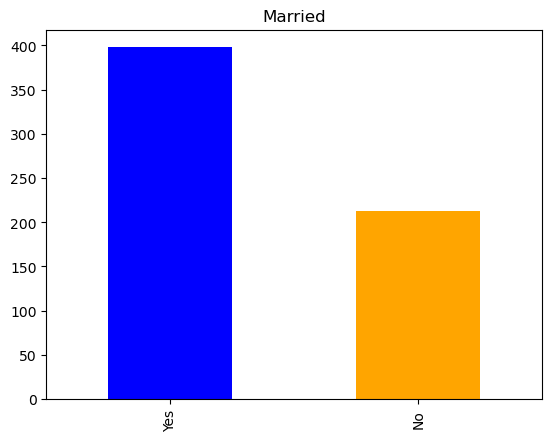

In [17]:
loan_df['Married'].value_counts()
loan_df['Married'].value_counts().plot.bar(color=[ 'blue','orange'])
plt.title('Married')

Text(0.5, 1.0, 'Dependents')

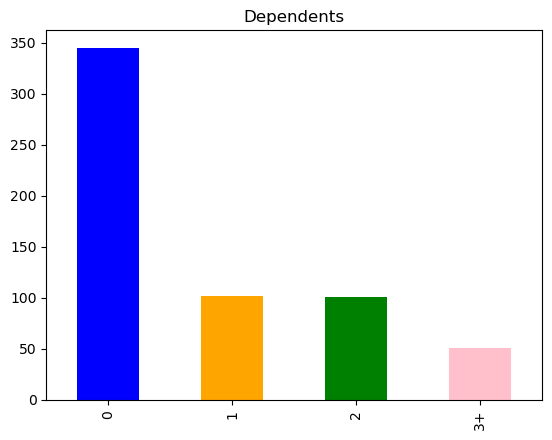

In [18]:
loan_df['Dependents'].value_counts()
loan_df['Dependents'].value_counts().plot.bar(color=[ 'blue','orange','green','pink'])
plt.title('Dependents')

Text(0.5, 1.0, 'Education')

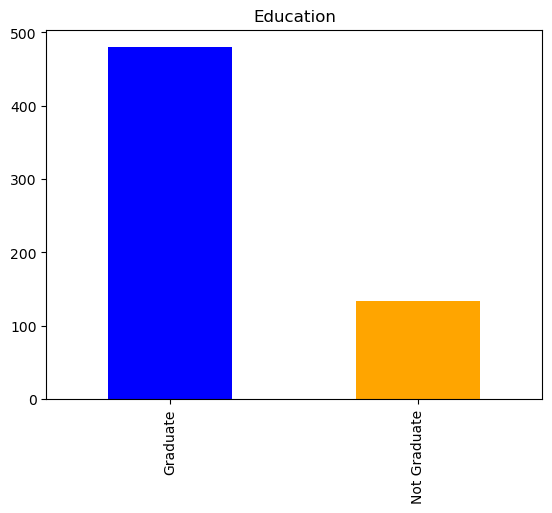

In [19]:
loan_df['Education'].value_counts()
loan_df['Education'].value_counts().plot.bar(color=[ 'blue','orange'])
plt.title('Education')

Text(0.5, 1.0, 'Self_Employed')

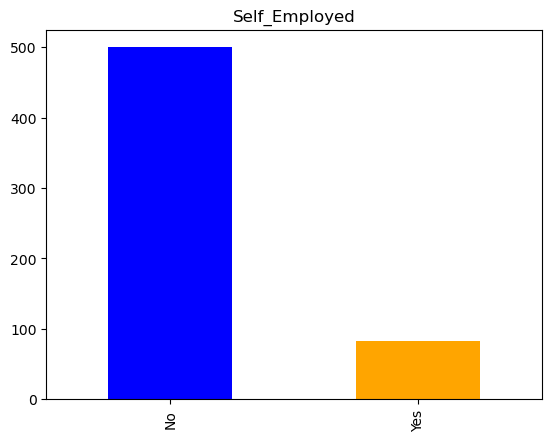

In [20]:
loan_df['Self_Employed'].value_counts()
loan_df['Self_Employed'].value_counts().plot.bar(color=[ 'blue','orange'])
plt.title('Self_Employed')

Text(0.5, 1.0, 'Credit_History')

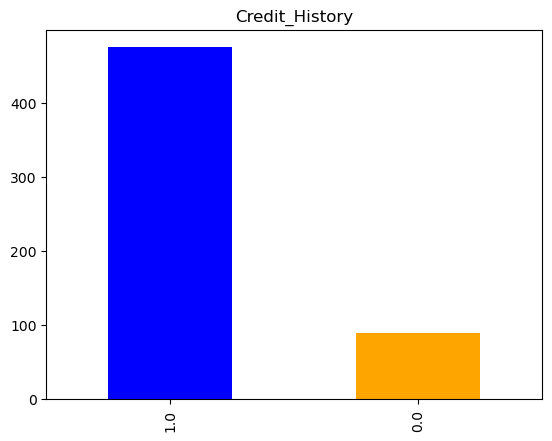

In [21]:
loan_df['Credit_History'].value_counts()
loan_df['Credit_History'].value_counts().plot.bar(color=[ 'blue','orange'])
plt.title('Credit_History')

Text(0.5, 1.0, 'Property_Area')

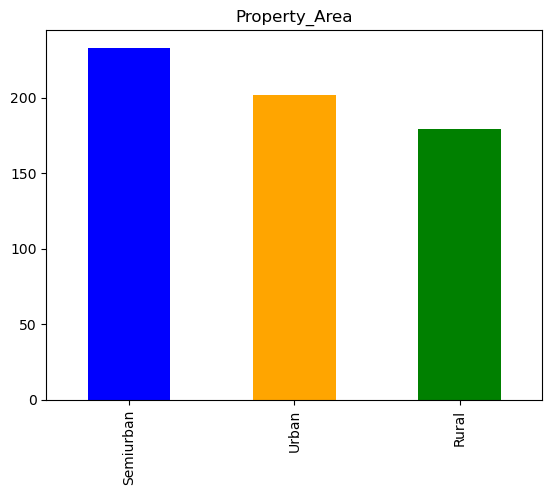

In [22]:
loan_df['Property_Area'].value_counts()
loan_df['Property_Area'].value_counts().plot.bar(color=[ 'blue','orange','green'])
plt.title('Property_Area')

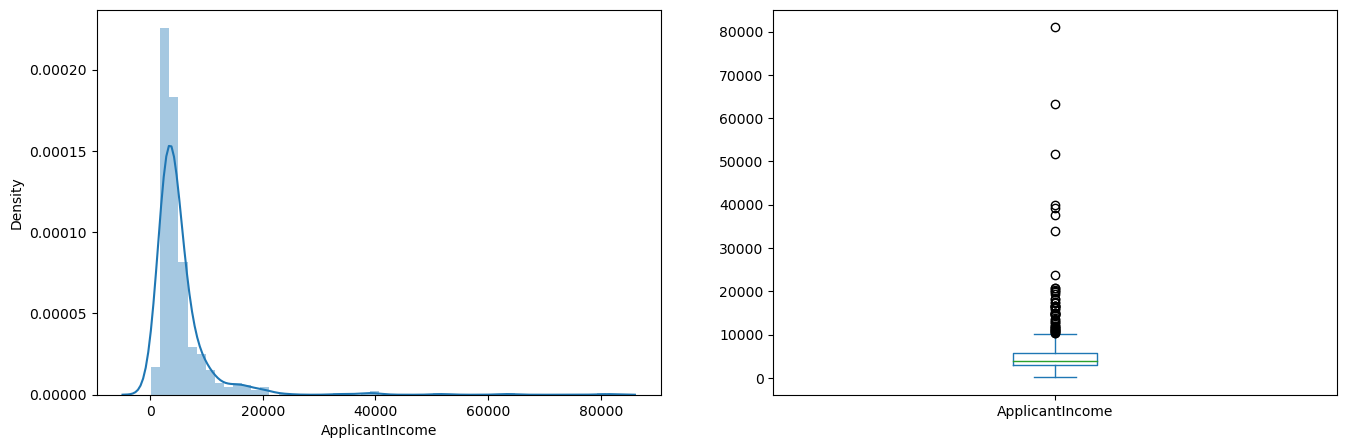

In [23]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(1)
plt.subplot(121)
sns.distplot(loan_df['ApplicantIncome']);

plt.subplot(122)
loan_df['ApplicantIncome'].plot.box(figsize=(16,5))

plt.show()


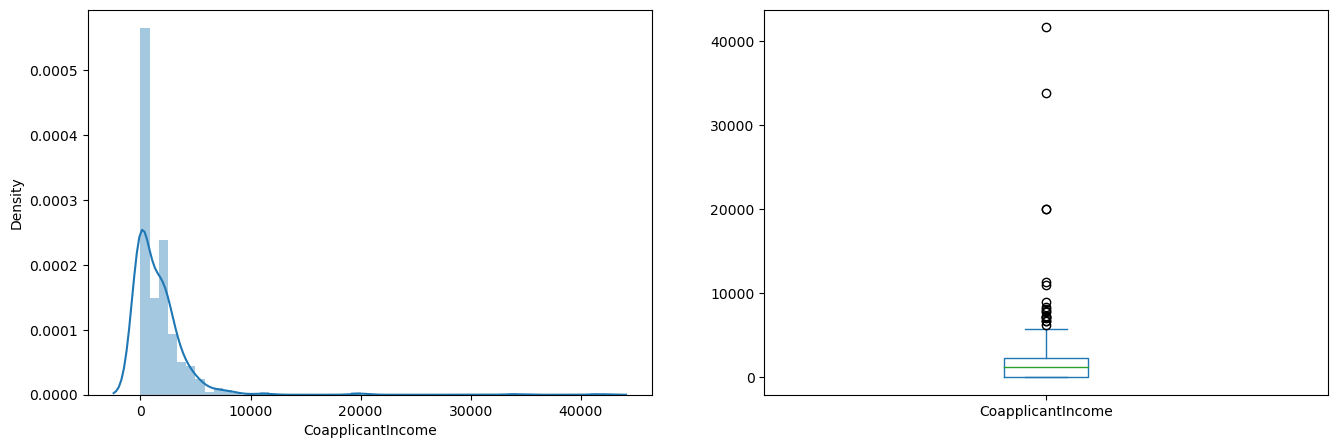

In [24]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(1)
plt.subplot(121)
sns.distplot(loan_df['CoapplicantIncome']);

plt.subplot(122)
loan_df['CoapplicantIncome'].plot.box(figsize=(16,5))

plt.show()


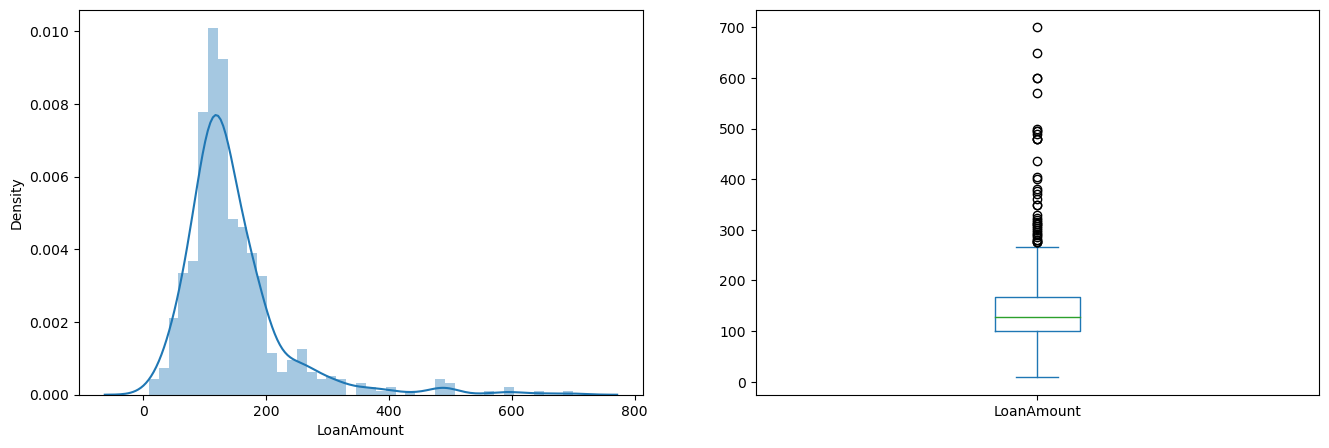

In [25]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(1)
plt.subplot(121)
sns.distplot(loan_df['LoanAmount']);

plt.subplot(122)
loan_df['LoanAmount'].plot.box(figsize=(16,5))

plt.show()


# bi-variate analysis

we will compare each variable against the target variable (loan status)

Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339


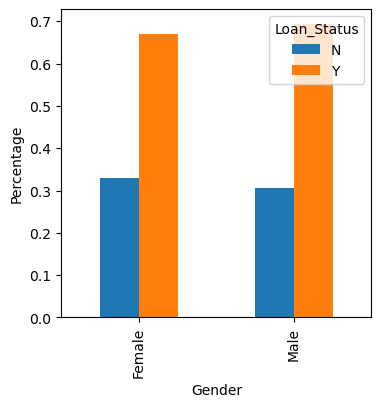

In [26]:
print(pd.crosstab(loan_df['Gender'],loan_df['Loan_Status']))

Gender=pd.crosstab(loan_df['Gender'],loan_df['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(4,4))
plt.xlabel('Gender')
p = plt.ylabel('Percentage')


Loan_Status    N    Y
Married              
No            79  134
Yes          113  285


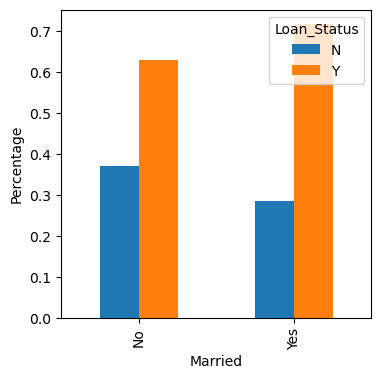

In [27]:
print(pd.crosstab(loan_df['Married'],loan_df['Loan_Status']))

Married=pd.crosstab(loan_df['Married'],loan_df['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(4,4))
plt.xlabel('Married')
p = plt.ylabel('Percentage')


Loan_Status    N    Y
Dependents           
0            107  238
1             36   66
2             25   76
3+            18   33


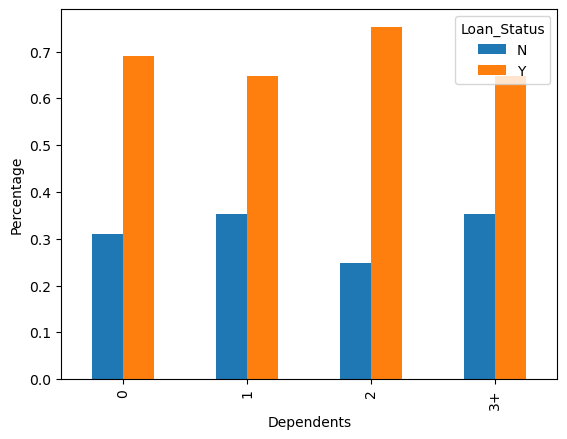

In [28]:
print(pd.crosstab(loan_df['Dependents'],loan_df['Loan_Status']))

Dependents=pd.crosstab(loan_df['Dependents'],loan_df['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar")
plt.xlabel('Dependents')
p = plt.ylabel('Percentage')


Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82


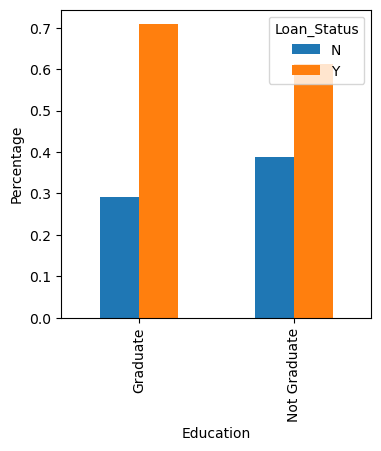

In [29]:
print(pd.crosstab(loan_df['Education'],loan_df['Loan_Status']))

Education=pd.crosstab(loan_df['Education'],loan_df['Loan_Status'])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(4,4))
plt.xlabel('Education')
p = plt.ylabel('Percentage')


Loan_Status      N    Y
Self_Employed          
No             157  343
Yes             26   56


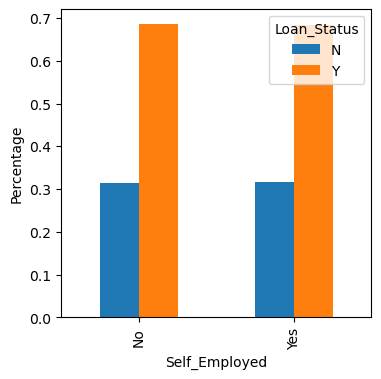

In [30]:
print(pd.crosstab(loan_df['Self_Employed'],loan_df['Loan_Status']))

Self_Employed=pd.crosstab(loan_df['Self_Employed'],loan_df['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(4,4))
plt.xlabel('Self_Employed')
p = plt.ylabel('Percentage')


Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378


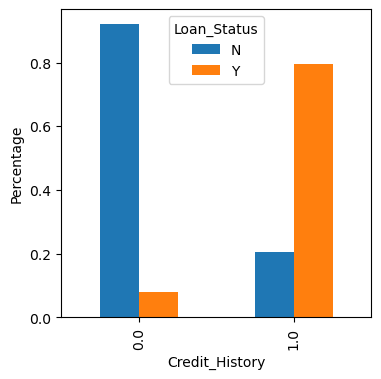

In [31]:
print(pd.crosstab(loan_df['Credit_History'],loan_df['Loan_Status']))

Credit_History=pd.crosstab(loan_df['Credit_History'],loan_df['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(4,4))
plt.xlabel('Credit_History')
p = plt.ylabel('Percentage')


Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133


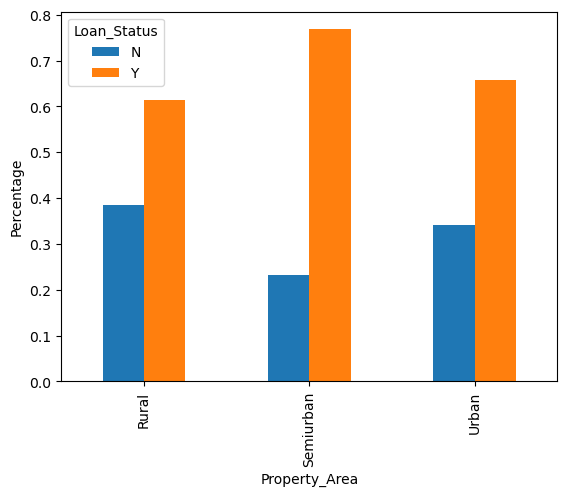

In [32]:
print(pd.crosstab(loan_df['Property_Area'],loan_df['Loan_Status']))

Property_Area=pd.crosstab(loan_df['Property_Area'],loan_df['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar")
plt.xlabel('Property_Area')
P = plt.ylabel('Percentage')


Loan_Status         N    Y
Loan_Amount_Term          
12.0                0    1
36.0                2    0
60.0                0    2
84.0                1    3
120.0               0    3
180.0              15   29
240.0               1    3
300.0               5    8
360.0             153  359
480.0               9    6


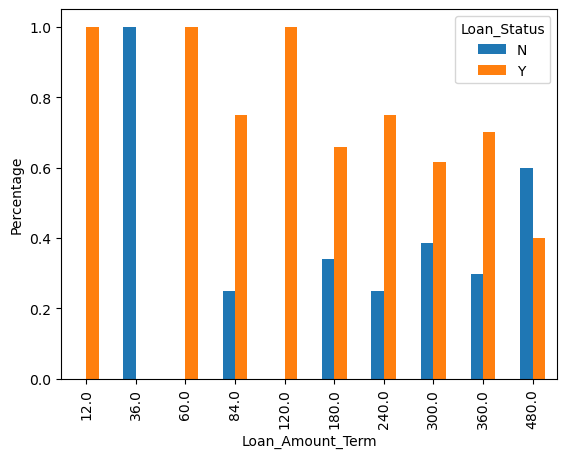

In [33]:
print(pd.crosstab(loan_df['Loan_Amount_Term'],loan_df['Loan_Status']))

Property_Area=pd.crosstab(loan_df['Loan_Amount_Term'],loan_df['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar")
plt.xlabel('Loan_Amount_Term')
P = plt.ylabel('Percentage')


In [34]:
loan_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [35]:
maxValue = loan_df[['ApplicantIncome']].max()



In [36]:
print(maxValue)

ApplicantIncome    81000
dtype: int64


In [37]:
minValue = loan_df[['ApplicantIncome']].min()
print(minValue)


ApplicantIncome    150
dtype: int64


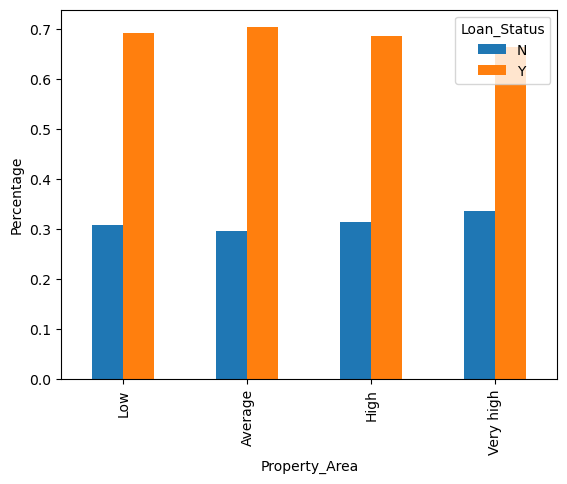

In [38]:
# Making bins for Applicant income variable
bins=[150,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
loan_df['Income_bin']=pd.cut(loan_df['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(loan_df['Income_bin'],loan_df['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar")
plt.xlabel('Property_Area')
P = plt.ylabel('Percentage')


In [39]:
loan_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,High
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High


In [40]:
maxValue = loan_df[['CoapplicantIncome']].max()
print(maxValue)
minValue = loan_df[['CoapplicantIncome']].min()
print(minValue)


CoapplicantIncome    41667.0
dtype: float64
CoapplicantIncome    0.0
dtype: float64


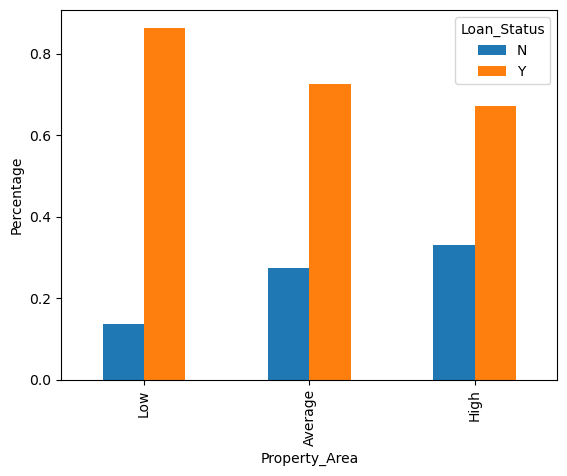

In [41]:
# Making bins for Coapplicant income variable
bins=[0,1000,3000,42000]
group=['Low','Average','High']
loan_df['Coapplicant_Income_bin']=pd.cut(loan_df['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(loan_df['Coapplicant_Income_bin'],loan_df['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar")
plt.xlabel('Property_Area')
P = plt.ylabel('Percentage')



In [42]:
maxValue = loan_df[['LoanAmount']].max()
print(maxValue)
minValue = loan_df[['LoanAmount']].min()
print(minValue)

LoanAmount    700.0
dtype: float64
LoanAmount    9.0
dtype: float64


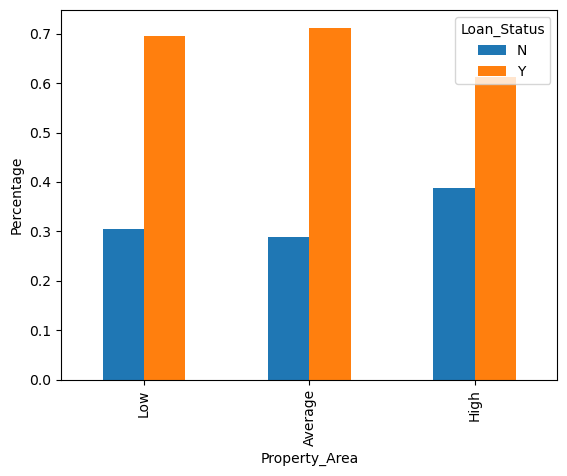

In [43]:
# Making bins for LoanAmount variable
bins=[0,100,200,700]
group=['Low','Average','High']
loan_df['LoanAmount_bin']=pd.cut(loan_df['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(loan_df['LoanAmount_bin'],loan_df['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar")
plt.xlabel('Property_Area')
P = plt.ylabel('Percentage')


In [44]:
train=loan_df.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin'], axis=1,inplace=True)


In [45]:
loan_df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Multivariate analysis

In [46]:
# Print correlation matrix (heat map)

import warnings
warnings.filterwarnings('ignore')
correlation=loan_df.corr()
print(correlation)


                   ApplicantIncome  CoapplicantIncome  LoanAmount  \
ApplicantIncome           1.000000          -0.116605    0.570909   
CoapplicantIncome        -0.116605           1.000000    0.188619   
LoanAmount                0.570909           0.188619    1.000000   
Loan_Amount_Term         -0.045306          -0.059878    0.039447   
Credit_History           -0.014715          -0.002056   -0.008433   

                   Loan_Amount_Term  Credit_History  
ApplicantIncome           -0.045306       -0.014715  
CoapplicantIncome         -0.059878       -0.002056  
LoanAmount                 0.039447       -0.008433  
Loan_Amount_Term           1.000000        0.001470  
Credit_History             0.001470        1.000000  


<Axes: >

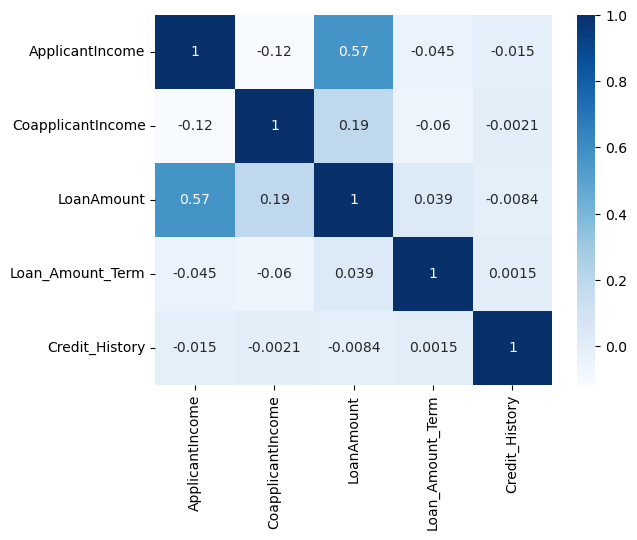

In [47]:
sns.heatmap(correlation,cmap="Blues",annot=True)

# Exploratory Data Analyis and Preprocessing

# Handling the Missing Values

In [51]:
loan_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [52]:
#we have null values in data set
loan_df.isnull().sum()


Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [53]:
#we will see data types of data set 
loan_df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [54]:
#printing numerical and categorical values present in the data set
import warnings
warnings.filterwarnings('ignore')

numerical_values =loan_df.select_dtypes(include = [np.number]).columns
categorical_values =loan_df.select_dtypes(include = [np.object]).columns
print(numerical_values)
print(categorical_values)


Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')
Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')


In [55]:
#filling null values
loan_df['Gender'] =loan_df['Gender'].fillna(loan_df['Gender'].mode()[0])
loan_df['Married'] = loan_df['Married'].fillna(loan_df['Married'].mode()[0])
loan_df['Dependents'] = loan_df['Dependents'].str.replace('+','')
loan_df['Dependents'] = loan_df['Dependents'].fillna(loan_df['Dependents'].mode()[0])
loan_df['LoanAmount'] = loan_df['LoanAmount'].fillna(loan_df['LoanAmount'].mode()[0])
loan_df['Self_Employed'] = loan_df['Self_Employed'].fillna(loan_df['Self_Employed'].mode()[0])
loan_df['Loan_Amount_Term'] = loan_df['Loan_Amount_Term'].fillna(loan_df['Loan_Amount_Term'].mode()[0])
loan_df['Credit_History'] = loan_df['Credit_History'].fillna(loan_df['Credit_History'].mode()[0])


In [56]:
#we filled all the null values by using stastics
loan_df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# outliers

In [57]:
loan_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


<Axes: >

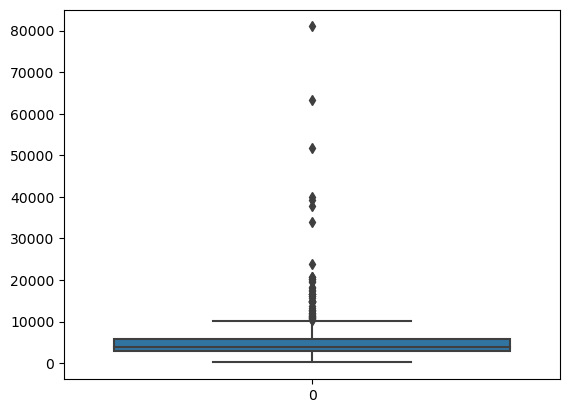

In [58]:
sns.boxplot(loan_df["ApplicantIncome"])

In [59]:
q1=loan_df['ApplicantIncome'].quantile(0.25)
q3=loan_df['ApplicantIncome'].quantile(0.75)
iqr=q3-q1
q1,q3,iqr

(2877.5, 5795.0, 2917.5)

In [60]:
upper_limit=q3+(1.5*iqr)
lower_limit=q3+(1.5*iqr)
lower_limit,upper_limit

(10171.25, 10171.25)

In [61]:
#finding the outliers
loan_df.loc[(loan_df['ApplicantIncome']>upper_limit)|(loan_df['ApplicantIncome']<lower_limit)]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


<Axes: >

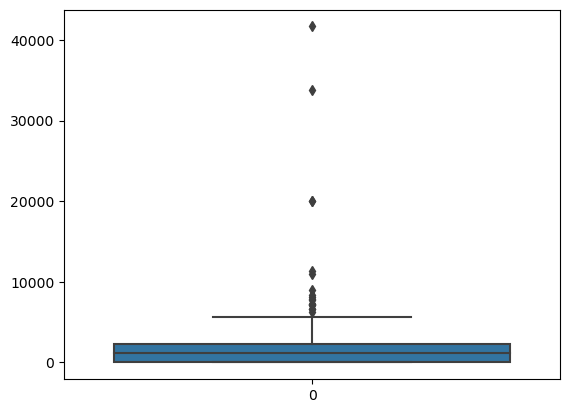

In [62]:
sns.boxplot(loan_df["CoapplicantIncome"])

In [63]:
q1=loan_df['CoapplicantIncome'].quantile(0.25)
q3=loan_df['CoapplicantIncome'].quantile(0.75)
iqr=q3-q1
q1,q3,iqr

(0.0, 2297.25, 2297.25)

In [64]:
upper_limit=q3+(1.5*iqr)
lower_limit=q3+(1.5*iqr)
lower_limit,upper_limit

(5743.125, 5743.125)

In [65]:
#finding the outliers
loan_df.loc[(loan_df['CoapplicantIncome']>upper_limit)|(loan_df['CoapplicantIncome']<lower_limit)]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


<Axes: >

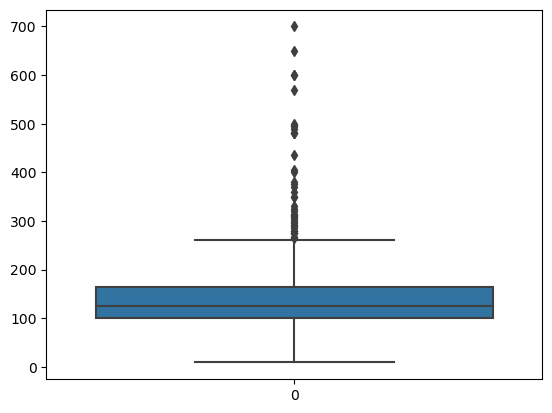

In [66]:
sns.boxplot(loan_df["LoanAmount"])

In [67]:
q1=loan_df['LoanAmount'].quantile(0.25)
q3=loan_df['CoapplicantIncome'].quantile(0.75)
iqr=q3-q1
q1,q3,iqr

(100.25, 2297.25, 2197.0)

In [68]:
upper_limit=q3+(1.5*iqr)
lower_limit=q3+(1.5*iqr)
lower_limit,upper_limit

(5592.75, 5592.75)

In [69]:
#finding the outliers
loan_df.loc[(loan_df['CoapplicantIncome']>upper_limit)|(loan_df['CoapplicantIncome']<lower_limit)]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


<Axes: xlabel='ApplicantIncome', ylabel='Density'>

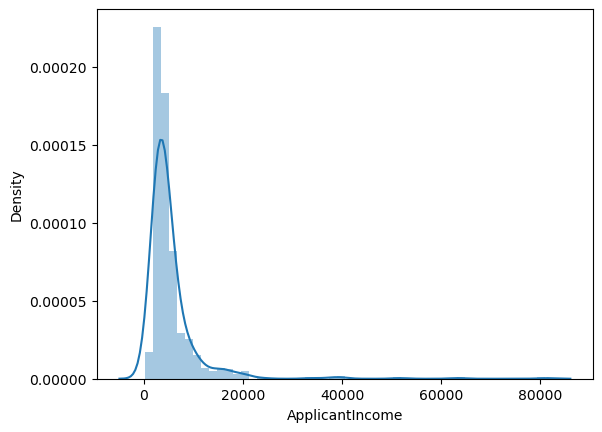

In [70]:
sns.distplot(loan_df['ApplicantIncome'])

<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

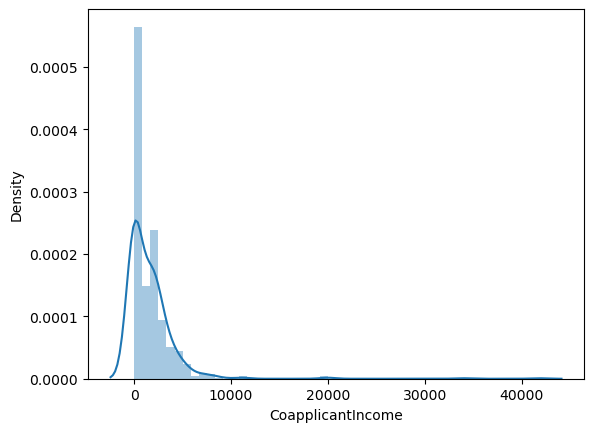

In [71]:
sns.distplot(loan_df['CoapplicantIncome'])

<Axes: xlabel='LoanAmount', ylabel='Density'>

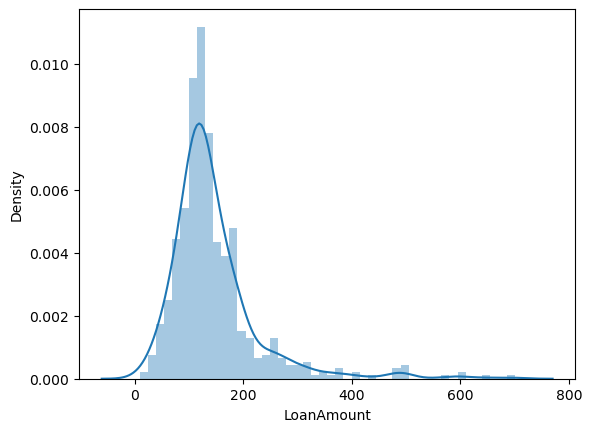

In [72]:
sns.distplot(loan_df['LoanAmount'])

In [73]:
loan_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Handling with categorical values

In [74]:
loan_df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [75]:
from sklearn.preprocessing import LabelEncoder

loan_df['Gender'].replace({'Male':1,'Female':0},inplace=True)
loan_df['Dependents'].replace({'0':0,'1':1,'2':2,'3':3},inplace=True)
loan_df['Married'].replace({'Yes':1,'No':0},inplace=True)
loan_df['Self_Employed'].replace({'Yes':1,'No':0},inplace=True)
loan_df['Property_Area'].replace({'Urban':2,'Rural':0,'Semiurban':1},inplace=True)
loan_df['Education'].replace({'Graduate':1,'Not Graduate':0},inplace=True)
loan_df['Loan_Status'].replace({'Y':1,'N':0},inplace=True)


In [76]:
loan_df['CoapplicantIncome']=loan_df['CoapplicantIncome'].astype("int64")
loan_df['LoanAmount']=loan_df['LoanAmount'].astype("int64")
loan_df['Loan_Amount_Term']=loan_df['Loan_Amount_Term'].astype("int64")
loan_df['Credit_History']=loan_df['Credit_History'].astype("int64")


In [77]:
loan_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0,120,360,1,2,1
1,1,1,1,1,0,4583,1508,128,360,1,0,0
2,1,1,0,1,1,3000,0,66,360,1,2,1
3,1,1,0,0,0,2583,2358,120,360,1,2,1
4,1,0,0,1,0,6000,0,141,360,1,2,1


# Handling imbalancing data

In [78]:
import numpy as np 
import pandas as pd
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
import warnings
warnings.filterwarnings('ignore')

In [79]:
#for handling the imbalancing data i use the smote technique
#smote stands for the Synthetic Minority Over-sampling TEchnique
from imblearn.combine import SMOTETomek



In [80]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

from imblearn.combine import SMOTETomek
smote = SMOTETomek(random_state=42)

y = loan_df['Loan_Status']
x = loan_df.drop(columns=['Loan_Status'],axis=1)



In [81]:
x_bal,y_bal = smote.fit_resample(x,y)
print(y.value_counts())
print(y_bal.value_counts())



1    422
0    192
Name: Loan_Status, dtype: int64
1    356
0    356
Name: Loan_Status, dtype: int64


# Scaling the data

In [82]:
scaler = StandardScaler()
x_bal = scaler.fit_transform(x_bal)
x_bal = pd.DataFrame(x_bal)
x_bal.head()



,0,1,2,3,4,5,6,7,8,9,10
0,0.551389,-1.155174,-0.691351,0.638055,-0.335410,0.120158,-0.589954,-0.280508,0.307468,0.638055,1.36871
1,0.551389,0.865671,-0.691351,0.638055,2.981424,-0.385427,-0.589954,-0.983753,0.307468,0.638055,1.36871
2,0.551389,0.865671,-0.691351,-1.567262,-0.335410,-0.459428,0.290829,-0.280508,0.307468,0.638055,1.36871
3,0.551389,-1.155174,-0.691351,0.638055,-0.335410,0.146954,-0.589954,-0.007024,0.307468,0.638055,1.36871
4,0.551389,0.865671,1.434963,0.638055,2.981424,0.043495,0.977376,1.633882,0.307468,0.638055,1.36871


# Model Building

In [83]:
import numpy as np 
import pandas as pd
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import  GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB





import warnings
warnings.filterwarnings('ignore')


# Splitting the data set

In [84]:
x_train, x_test, y_train, y_test = train_test_split(x_bal, y_bal, test_size = 0.33, random_state = 42)

# KNeighboursclassifier

In [85]:
from sklearn.neighbors import KNeighborsClassifier
def kneighborsClassifier(x_train, x_test, y_train, y_test):
    knn = KNeighborsClassifier() 
    knn.fit(x_train,y_train)
    yPred = knn.predict(x_test)
    print("****KNN****") 
    print("Confusion matrix")
    print(confusion_matrix(y_test ,yPred) ) 
    print("Classification report")
    print(classification_report (y_test, yPred))
    y_pred=knn.predict(x_test)
    y_pred1=knn.predict(x_train)
    knn_test_accuracy = accuracy_score(y_test,y_pred)
    knn_train_accuracy = accuracy_score(y_train,y_pred1)
    print('Testing accuracy: ',knn_test_accuracy)
    print('Training accuracy: ', knn_train_accuracy)

kneighborsClassifier(x_train, x_test, y_train, y_test)


****KNN****
Confusion matrix
[[80 43]
 [13 99]]
Classification report
              precision    recall  f1-score   support

           0       0.86      0.65      0.74       123
           1       0.70      0.88      0.78       112

    accuracy                           0.76       235
   macro avg       0.78      0.77      0.76       235
weighted avg       0.78      0.76      0.76       235

Testing accuracy:  0.7617021276595745
Training accuracy:  0.8490566037735849


# Decision tree classifier

In [86]:
def decisionTreeClassifier(x_train, x_test, y_train, y_test):
    dt = DecisionTreeClassifier() 
    dt.fit(x_train,y_train)
    yPred = dt.predict(x_test)
    print("****DecisionTreeClassifier****") 
    print("Confusion matrix")
    print(confusion_matrix(y_test ,yPred) ) 
    print("Classification report")
    print(classification_report (y_test, yPred))
    y_pred=dt.predict(x_test)
    y_pred1=dt.predict(x_train)
    decision_tree_test_accuracy = accuracy_score(y_test,y_pred)
    decision_tree_train_accuracy = accuracy_score(y_train,y_pred1)
    print('Testing accuracy: ', decision_tree_test_accuracy)
    print('Training accuracy: ', decision_tree_train_accuracy)

decisionTreeClassifier(x_train, x_test, y_train, y_test)


****DecisionTreeClassifier****
Confusion matrix
[[95 28]
 [16 96]]
Classification report
              precision    recall  f1-score   support

           0       0.86      0.77      0.81       123
           1       0.77      0.86      0.81       112

    accuracy                           0.81       235
   macro avg       0.82      0.81      0.81       235
weighted avg       0.82      0.81      0.81       235

Testing accuracy:  0.8127659574468085
Training accuracy:  1.0


# Random forest classifier

In [87]:
def randomForestClassifier(x_train, x_test, y_train, y_test):
    rf = RandomForestClassifier() 
    rf.fit(x_train,y_train)
    yPred = rf.predict(x_test)
    print("****RandomForestClassifier****") 
    print("Confusion matrix")
    print(confusion_matrix(y_test ,yPred) ) 
    print("Classification report")
    print(classification_report (y_test, yPred))
    y_pred=rf.predict(x_test)
    y_pred1=rf.predict(x_train)
    random_forest_test_accuracy = accuracy_score(y_test,y_pred)
    random_forest_train_accuracy = accuracy_score(y_train,y_pred1)
    print('Testing accuracy: ', random_forest_test_accuracy)
    print('Training accuracy: ',random_forest_train_accuracy)

randomForestClassifier(x_train, x_test, y_train, y_test)


****RandomForestClassifier****
Confusion matrix
[[90 33]
 [13 99]]
Classification report
              precision    recall  f1-score   support

           0       0.87      0.73      0.80       123
           1       0.75      0.88      0.81       112

    accuracy                           0.80       235
   macro avg       0.81      0.81      0.80       235
weighted avg       0.81      0.80      0.80       235

Testing accuracy:  0.8042553191489362
Training accuracy:  1.0


# xgboost classifier

In [88]:
def xgboost(x_train, x_test, y_train, y_test):
    xg = GradientBoostingClassifier() 
    xg.fit(x_train,y_train)
    yPred = xg.predict(x_test)
    print("****Gradient BoostingClassifier****") 
    print("Confusion matrix")
    print(confusion_matrix(y_test ,yPred) ) 
    print("Classification report")
    print(classification_report (y_test, yPred))
    y_pred=xg.predict(x_test)
    y_pred1=xg.predict(x_train)
    xgboost_test_accuracy = accuracy_score(y_test,y_pred)
    xgboost_train_accuracy = accuracy_score(y_train,y_pred1)
    print('Testing accuracy: ', xgboost_test_accuracy)
    print('Training accuracy: ', xgboost_train_accuracy)
  
xgboost(x_train, x_test, y_train, y_test)


****Gradient BoostingClassifier****
Confusion matrix
[[ 86  37]
 [ 10 102]]
Classification report
              precision    recall  f1-score   support

           0       0.90      0.70      0.79       123
           1       0.73      0.91      0.81       112

    accuracy                           0.80       235
   macro avg       0.81      0.80      0.80       235
weighted avg       0.82      0.80      0.80       235

Testing accuracy:  0.8
Training accuracy:  0.9559748427672956


In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score




# logistic regression

# support vector machine

# GaussianNb

In [128]:
models={
    "Logistic Regression":LogisticRegression(),
    "svm":SVC(),
    "GaussianNB":GaussianNB()
}
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(x_train, y_train) #train model
    
    #make predictions
    y_train_pred =model.predict(x_train)
    y_test_pred =model.predict(x_test)
    
    #Training set performance
    model_train_accuracy=accuracy_score(y_train, y_train_pred)
    
    
    model_train_f1=f1_score(y_train, y_train_pred,average='weighted')
    
    
    
    #Testing set performance
    model_test_accuracy=accuracy_score(y_test, y_test_pred)
    
    model_test_f1=f1_score(y_test, y_test_pred,average='weighted')
    
    print(list(models.keys())[i])
    
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print("- F1 score: {:.4f}".format(model_train_f1))
    
    
    
    print('--------------------------------------------------------------------------')
    print('Model performance for Testing set')
    print("- Accuracy: {:.4f}".format(model_test_accuracy))
    print("- F1 score: {:.4f}".format(model_test_f1))
    
    
    
    print('='*35)
    print('\n')
    
    
    
    
    



Logistic Regression
Model performance for Training set
- Accuracy: 0.7925
- F1 score: 0.7897
--------------------------------------------------------------------------
Model performance for Testing set
- Accuracy: 0.7702
- F1 score: 0.7689


svm
Model performance for Training set
- Accuracy: 0.8344
- F1 score: 0.8302
--------------------------------------------------------------------------
Model performance for Testing set
- Accuracy: 0.7660
- F1 score: 0.7593


GaussianNB
Model performance for Training set
- Accuracy: 0.7799
- F1 score: 0.7783
--------------------------------------------------------------------------
Model performance for Testing set
- Accuracy: 0.7489
- F1 score: 0.7480




In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_auc_score
x_train, x_test, y_train, y_test = train_test_split(x_bal, y_bal, test_size = 0.33, random_state = 42)
logreg = LogisticRegression()

# Fit the model to the training data
logreg.fit(x_train, y_train)

# Make predictions on the test data
y_bal = logreg.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_bal)
conf_matrix = confusion_matrix(y_test, y_bal)
classification_rep = classification_report(y_test, y_bal)
precision = precision_score(y_test, y_bal)
recall = recall_score(y_test, y_bal)
f1 = f1_score(y_test, y_bal)
roc_auc = roc_auc_score(y_test, y_bal)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")




Accuracy: 0.77
Confusion Matrix:
[[84 39]
 [15 97]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.68      0.76       123
           1       0.71      0.87      0.78       112

    accuracy                           0.77       235
   macro avg       0.78      0.77      0.77       235
weighted avg       0.78      0.77      0.77       235

Precision: 0.71
Recall: 0.87
F1 Score: 0.78
ROC AUC Score: 0.77


In [91]:
from sklearn.svm import SVC
svm = SVC()

# Fit the model to the training data
svm.fit(x_train, y_train)

# Make predictions on the test data
y_bal = svm.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_bal)
conf_matrix = confusion_matrix(y_test, y_bal)
classification_rep = classification_report(y_test, y_bal)
precision = precision_score(y_test, y_bal)
recall = recall_score(y_test, y_bal)
f1 = f1_score(y_test, y_bal)
roc_auc = roc_auc_score(y_test, y_bal)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")


Accuracy: 0.77
Confusion Matrix:
[[ 73  50]
 [  5 107]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.59      0.73       123
           1       0.68      0.96      0.80       112

    accuracy                           0.77       235
   macro avg       0.81      0.77      0.76       235
weighted avg       0.81      0.77      0.76       235

Precision: 0.68
Recall: 0.96
F1 Score: 0.80
ROC AUC Score: 0.77


In [92]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

# Fit the model to the training data
gnb.fit(x_train, y_train)

# Make predictions on the test data
y_bal = gnb.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_bal)
conf_matrix = confusion_matrix(y_test, y_bal)
classification_rep = classification_report(y_test, y_bal)
precision = precision_score(y_test, y_bal)
recall = recall_score(y_test, y_bal)
f1 = f1_score(y_test, y_bal)
roc_auc = roc_auc_score(y_test, y_bal)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")

Accuracy: 0.75
Confusion Matrix:
[[83 40]
 [19 93]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.67      0.74       123
           1       0.70      0.83      0.76       112

    accuracy                           0.75       235
   macro avg       0.76      0.75      0.75       235
weighted avg       0.76      0.75      0.75       235

Precision: 0.70
Recall: 0.83
F1 Score: 0.76
ROC AUC Score: 0.75


In [93]:
from sklearn.model_selection import cross_val_score
forest_reg = RandomForestClassifier(n_estimators = 10, criterion = "entropy", random_state = 42) 
forest_reg.fit(x_train,y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [94]:
yPred = forest_reg.predict(x_test)
y_pred=forest_reg.predict(x_test)
y_pred1=forest_reg.predict(x_train)
random_forest_test_accuracy = accuracy_score(y_test,y_pred)
random_forest_train_accuracy = accuracy_score(y_train,y_pred1)
print('Testing accuracy: ', random_forest_test_accuracy)
print('Training accuracy: ',random_forest_train_accuracy)
f1_score(yPred,y_test, average='weighted')
cv = cross_val_score(forest_reg,x,y,cv=5)
np.mean(cv)


Testing accuracy:  0.7872340425531915
Training accuracy:  0.9853249475890985


0.7638278022124483

# Hyper parameter tuning

In [95]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(n_estimators=10).fit(x_train,y_train)
prediction=rf_classifier.predict(x_test)


In [96]:
y.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [97]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,prediction))
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))


[[95 28]
 [27 85]]
0.7659574468085106
              precision    recall  f1-score   support

           0       0.78      0.77      0.78       123
           1       0.75      0.76      0.76       112

    accuracy                           0.77       235
   macro avg       0.77      0.77      0.77       235
weighted avg       0.77      0.77      0.77       235



In [98]:
#Manual hyper parameter tuning

In [99]:
model=RandomForestClassifier(n_estimators=300,criterion='entropy',
                             max_features='sqrt',min_samples_leaf=10,random_state=100).fit(x_train,y_train)
predictions=model.predict(x_test)
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))
print(classification_report(y_test,predictions))


[[ 81  42]
 [  7 105]]
0.7914893617021277
              precision    recall  f1-score   support

           0       0.92      0.66      0.77       123
           1       0.71      0.94      0.81       112

    accuracy                           0.79       235
   macro avg       0.82      0.80      0.79       235
weighted avg       0.82      0.79      0.79       235



In [100]:
#No hyper parameter tuning
def randomForestClassifier(x_train, x_test, y_train, y_test):
    rf = RandomForestClassifier() 
    rf.fit(x_train,y_train)
    yPred = rf.predict(x_test)
    print("****RandomForestClassifier****") 
    print("Confusion matrix")
    print(confusion_matrix(y_test ,yPred) ) 
    print("Classification report")
    print(classification_report (y_test, yPred))
    y_pred=rf.predict(x_test)
    y_pred1=rf.predict(x_train)
    random_forest_test_accuracy = accuracy_score(y_test,y_pred)
    random_forest_train_accuracy = accuracy_score(y_train,y_pred1)
    print('Testing accuracy: ', random_forest_test_accuracy)
    print('Training accuracy: ',random_forest_train_accuracy)

randomForestClassifier(x_train, x_test, y_train, y_test)


****RandomForestClassifier****
Confusion matrix
[[ 90  33]
 [ 11 101]]
Classification report
              precision    recall  f1-score   support

           0       0.89      0.73      0.80       123
           1       0.75      0.90      0.82       112

    accuracy                           0.81       235
   macro avg       0.82      0.82      0.81       235
weighted avg       0.83      0.81      0.81       235

Testing accuracy:  0.8127659574468085
Training accuracy:  1.0


In [101]:
#Manual hyper parameter tuning
def randomForestClassifier(x_train, x_test, y_train, y_test):
    rf = RandomForestClassifier(n_estimators=300,criterion='entropy',
                             max_features='sqrt',min_samples_leaf=10,random_state=100)
    rf.fit(x_train,y_train)
    yPred = rf.predict(x_test)
    print("****RandomForestClassifier****") 
    print("Confusion matrix")
    print(confusion_matrix(y_test ,yPred) ) 
    print("Classification report")
    print(classification_report (y_test, yPred))
    y_pred=rf.predict(x_test)
    y_pred1=rf.predict(x_train)
    random_forest_test_accuracy = accuracy_score(y_test,y_pred)
    random_forest_train_accuracy = accuracy_score(y_train,y_pred1)
    print('Testing accuracy: ', random_forest_test_accuracy)
    print('Training accuracy: ',random_forest_train_accuracy)

randomForestClassifier(x_train, x_test, y_train, y_test)


****RandomForestClassifier****
Confusion matrix
[[ 81  42]
 [  7 105]]
Classification report
              precision    recall  f1-score   support

           0       0.92      0.66      0.77       123
           1       0.71      0.94      0.81       112

    accuracy                           0.79       235
   macro avg       0.82      0.80      0.79       235
weighted avg       0.82      0.79      0.79       235

Testing accuracy:  0.7914893617021277
Training accuracy:  0.8511530398322851


# Randomized search cv


In [102]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]



In [103]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)



{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [104]:
rf_Model = RandomForestClassifier()


In [105]:

from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 10, verbose=2, n_jobs = 4)


In [106]:

rf_Grid.fit(x_train, y_train)

Fitting 10 folds for each of 320 candidates, totalling 3200 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [108]:
rf_Grid.best_params_


{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 33}

# Grid search

In [109]:
from sklearn.model_selection import RandomizedSearchCV
rf_RandomGrid = RandomizedSearchCV(estimator = rf_Model, param_distributions = param_grid, cv = 10, verbose=2, n_jobs = 4)


In [110]:
rf_RandomGrid.fit(x_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 4],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [10, 17, 25, 33, 41, 48,
                                                         56, 64, 72, 80]},
                   verbose=2)

In [111]:
rf_Grid.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 33}

In [112]:
rf_RandomGrid.best_params_


{'n_estimators': 41,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 4,
 'bootstrap': False}

In [113]:
print (f'Train Accuracy - : {rf_Grid.score(x_train,y_train):.3f}')
print (f'Test Accuracy - : {rf_Grid.score(x_test,y_test):.3f}')


Train Accuracy - : 0.832
Test Accuracy - : 0.787


In [114]:
print (f'Train Accuracy - : {rf_RandomGrid.score(x_train,y_train):.3f}')
print (f'Test Accuracy - : {rf_RandomGrid.score(x_test,y_test):.3f}')

Train Accuracy - : 0.847
Test Accuracy - : 0.796


finally by doing hyper parameter tuning we see the results
=>Based on that random forest is selected for model building

In [122]:
def randomForestClassifier(x_train, x_test, y_train, y_test):
    rf = RandomForestClassifier() 
    rf.fit(x_train,y_train)
    yPred = rf.predict(x_test)
    print("****RandomForestClassifier****") 
    print("Confusion matrix")
    print(confusion_matrix(y_test ,yPred) ) 
    print("Classification report")
    print(classification_report (y_test, yPred))
    y_pred=rf.predict(x_test)
    y_pred1=rf.predict(x_train)
    random_forest_test_accuracy = accuracy_score(y_test,y_pred)
    random_forest_train_accuracy = accuracy_score(y_train,y_pred1)
    print('Testing accuracy: ', random_forest_test_accuracy)
    print('Training accuracy: ',random_forest_train_accuracy)

randomForestClassifier(x_train, x_test, y_train, y_test)

****RandomForestClassifier****
Confusion matrix
[[ 92  31]
 [ 10 102]]
Classification report
              precision    recall  f1-score   support

           0       0.90      0.75      0.82       123
           1       0.77      0.91      0.83       112

    accuracy                           0.83       235
   macro avg       0.83      0.83      0.83       235
weighted avg       0.84      0.83      0.82       235

Testing accuracy:  0.825531914893617
Training accuracy:  1.0
